In [1]:
from preprocessing import *
from model_train_predict import *
from utils import *

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import lag_plot

import warnings
warnings.filterwarnings("ignore")

In [2]:
ticker = 'FB' # Facebook
number = 1000

df, data = load_data(ticker=ticker, number=number)
print(len(df))

df = df.copy()[:100]

Data saved to : stock_market_data-FB_2020-12-14.csv
1000


# 1. Exploratory Data Analys (EDA)

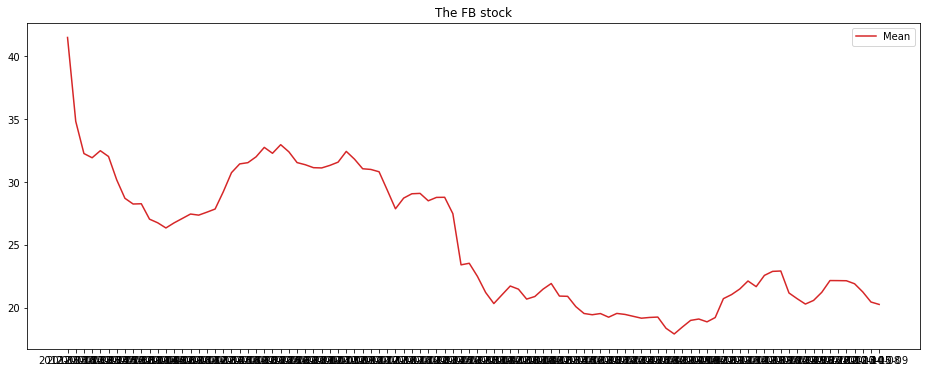

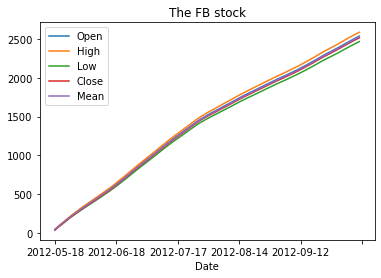

Dickey-Fuller test results

Test Statistic    -3.355446
p-value            0.012575
# of lags          0.000000
# of obs          99.000000
dtype: float64
Critical value at 1%: -3.49820
Critical value at 5%: -2.89121
Critical value at 10%: -2.58260


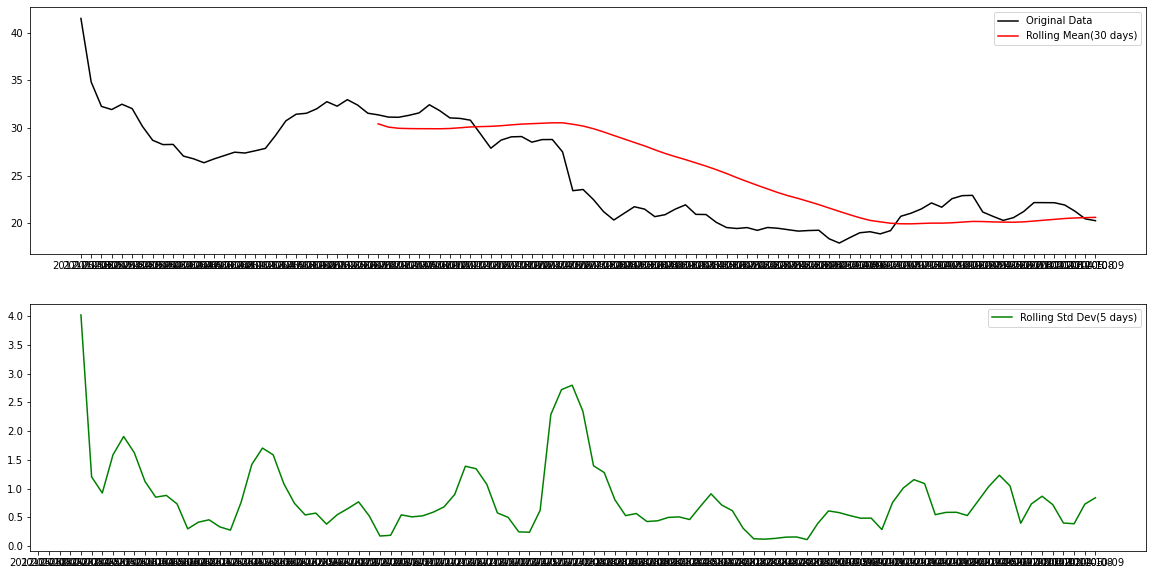

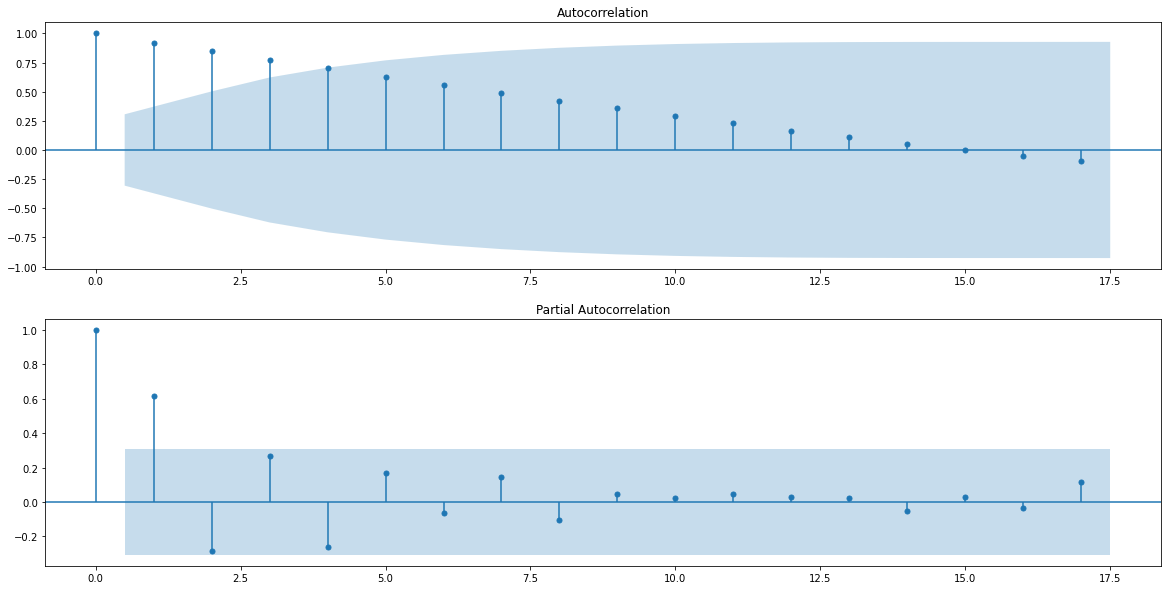

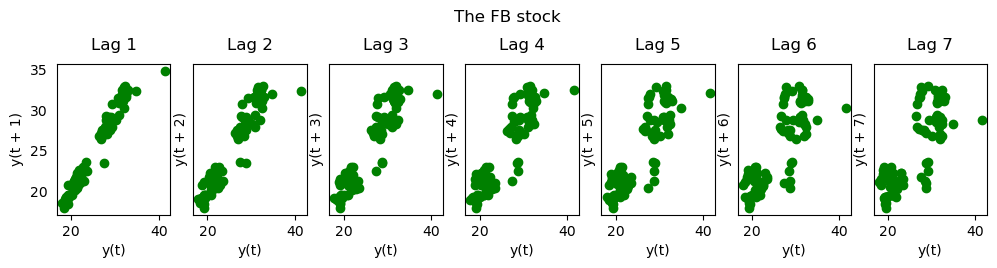

In [3]:
# overview data
plt.figure(figsize=(16,6))
plt.plot(df.Mean, label = "Mean" , color='tab:red')
plt.title(f'The {ticker} stock')
plt.legend(loc='best')
plt.show()

# Draw comulative plot
plot_cumsum(df, ticker)

# check stationarity
check_stationarity(df.Mean)

# Tính Autocorrection and Partial Autocorrection
autocorrelation_partialAutocorrection(df)

# Dùng lag_plot để view autocorrelation
autocorrelation(df, ticker)

## => timeStep = 4 + 1 = 5 (lấy 4 điểm trong quá khứ để dự đoán tương lai)

# 2. Setup general params 

## 2.1 search params for ARIMA

In [4]:
n = int(0.7 * len(data))

data_train = data[:n]
data_test = data[n:]

print(f'The shape of the data_train is {data_train.shape}')
print(f'The shape of the data_test is {data_test.shape}')

n = int(0.1 * len(data))
order = ARIMA_search_params(data[:n])

The shape of the data_train is (700, 1)
The shape of the data_test is (300, 1)
ARIMA(0, 0, 0) RMSE=6.145
ARIMA(0, 0, 1) RMSE=3.378
ARIMA(0, 0, 2) RMSE=2.033
ARIMA(0, 1, 0) RMSE=0.595
ARIMA(0, 1, 1) RMSE=0.585
ARIMA(0, 1, 2) RMSE=0.594
ARIMA(0, 2, 0) RMSE=0.699
ARIMA(0, 2, 1) RMSE=0.639
ARIMA(0, 2, 2) RMSE=0.616
ARIMA(1, 0, 0) RMSE=0.597
ARIMA(1, 0, 1) RMSE=0.588
ARIMA(1, 0, 2) RMSE=0.600
ARIMA(1, 1, 0) RMSE=0.589
ARIMA(1, 1, 1) RMSE=0.593
ARIMA(1, 1, 2) RMSE=0.621
ARIMA(1, 2, 0) RMSE=0.677
ARIMA(1, 2, 1) RMSE=0.613
ARIMA(1, 2, 2) RMSE=0.616
ARIMA(2, 0, 0) RMSE=0.599
ARIMA(2, 0, 1) RMSE=0.601
ARIMA(2, 0, 2) RMSE=0.593
ARIMA(2, 1, 0) RMSE=0.591
ARIMA(2, 1, 1) RMSE=0.587
ARIMA(2, 1, 2) RMSE=0.605
ARIMA(2, 2, 0) RMSE=0.671
ARIMA(2, 2, 1) RMSE=0.625
ARIMA(2, 2, 2) RMSE=0.627
Best ARIMA(0, 1, 1) RMSE=0.585


## 2.2. model params

In [5]:
timeStep=5
epochs = 500

# 3. Build models

## 3.1. ARIMA model

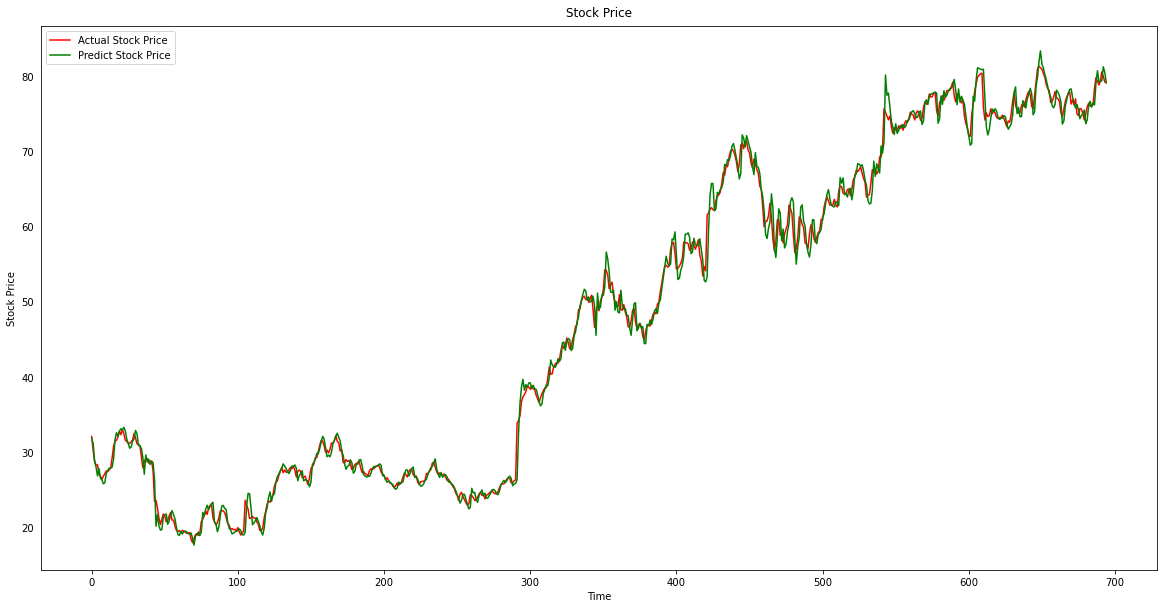

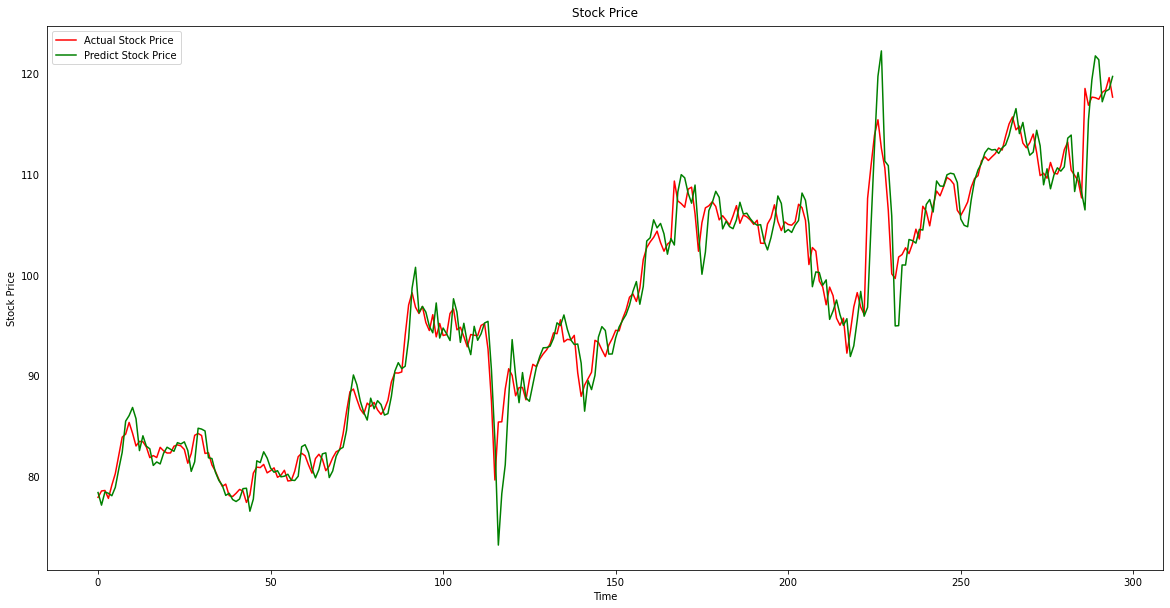

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 1.2346, 0.8718
RMSE_test, MAE_test = 2.3129, 1.5469

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5821
Precision  according to the trend: 0.5497
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.5204
Precision  according to the trend: 0.4667


In [6]:
# predict
y_train, y_train_pred = ARIMA_single(data_train, timeStep=timeStep, order=order)

y_test, y_test_pred = ARIMA_single(data_test, timeStep=timeStep, order=order)

# plot graph
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)


print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)

## 3.2. LSTM model

Epoch 1/500
18/18 [==============================] - 1s 57ms/step - loss: 0.0959 - val_loss: 0.2241
Epoch 2/500
18/18 [==============================] - 0s 5ms/step - loss: 0.0263 - val_loss: 0.0118
Epoch 3/500
18/18 [==============================] - 0s 5ms/step - loss: 0.0147 - val_loss: 0.0268
Epoch 4/500
18/18 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 0.0023
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 7.1892e-04
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 7/500
18/18 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 8/500
18/18 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 9.2965e-04
Epoch 9/500
18/18 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 10/500
18/18 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 6.9481e

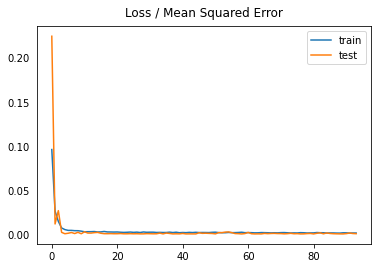

In [7]:
# train
model_lstm, hist_lstm, sc = LSTM_model(data_train, epochs=epochs, timeStep=timeStep)

plot_history(hist_lstm)

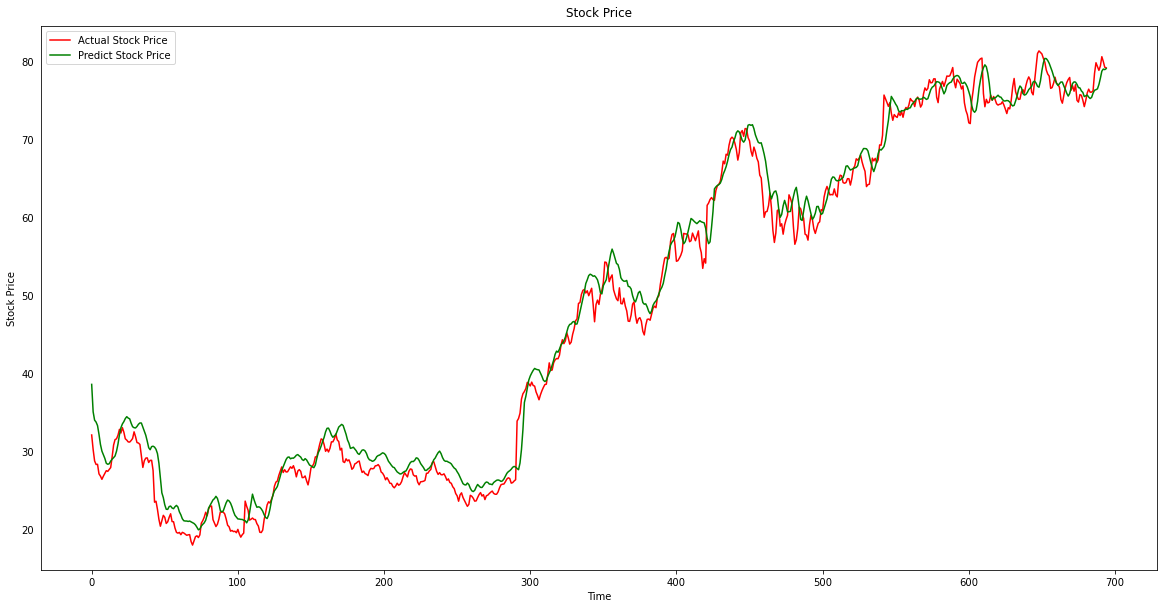

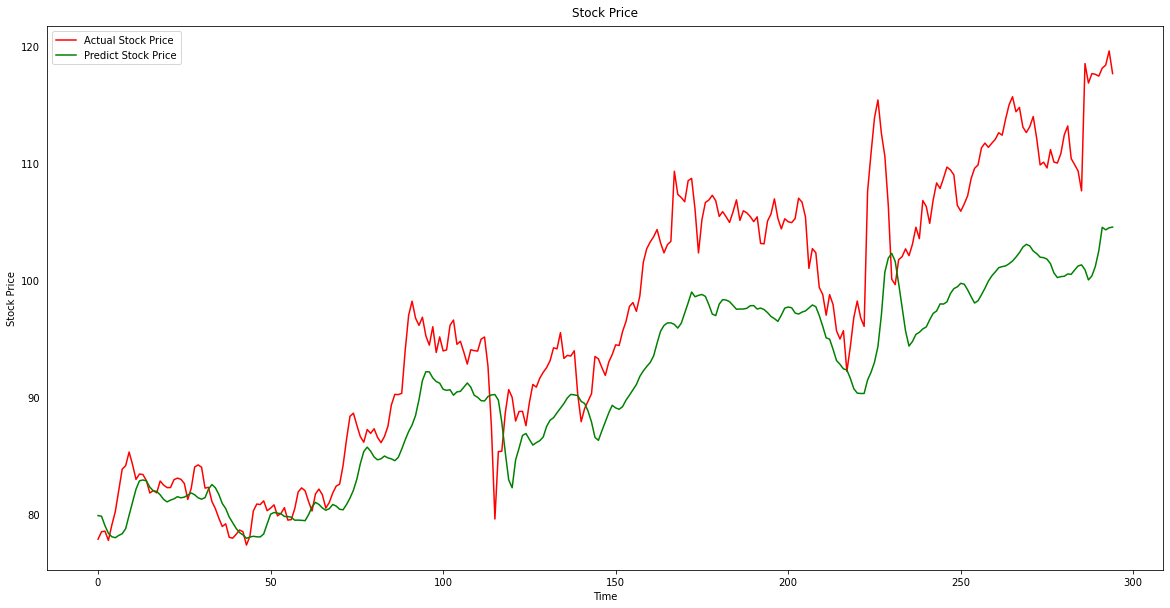

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 2.3846, 1.8767
RMSE_test, MAE_test = 7.3034, 5.8825

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5432
Precision  according to the trend: 0.5076
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.4966
Precision  according to the trend: 0.4403


In [8]:
y_train, y_train_pred = LSTM_predict(model_lstm, data_train, sc, timeStep=timeStep)

y_test, y_test_pred = LSTM_predict(model_lstm, data_test, sc, timeStep=timeStep)

# plot graphs
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)

print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)

## 3.3. ARIMA_LSTM model

Epoch 1/500
18/18 [==============================] - 2s 85ms/step - loss: 0.3608 - val_loss: 0.3531
Epoch 2/500
18/18 [==============================] - 0s 6ms/step - loss: 0.3256 - val_loss: 0.2690
Epoch 3/500
18/18 [==============================] - 0s 6ms/step - loss: 0.2633 - val_loss: 0.2050
Epoch 4/500
18/18 [==============================] - 0s 6ms/step - loss: 0.2053 - val_loss: 0.1625
Epoch 5/500
18/18 [==============================] - 0s 6ms/step - loss: 0.2034 - val_loss: 0.1420
Epoch 6/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1947 - val_loss: 0.1352
Epoch 7/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1664 - val_loss: 0.1261
Epoch 8/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1416 - val_loss: 0.1129
Epoch 9/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1367 - val_loss: 0.1129
Epoch 10/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1391 - val_loss: 0.1004
Epoch 11

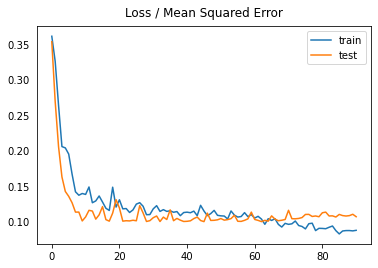

In [9]:
model, history = ARIMA_LSTM_model(data_train, order=order, epochs=epochs, timeStep=timeStep)

plot_history(history)

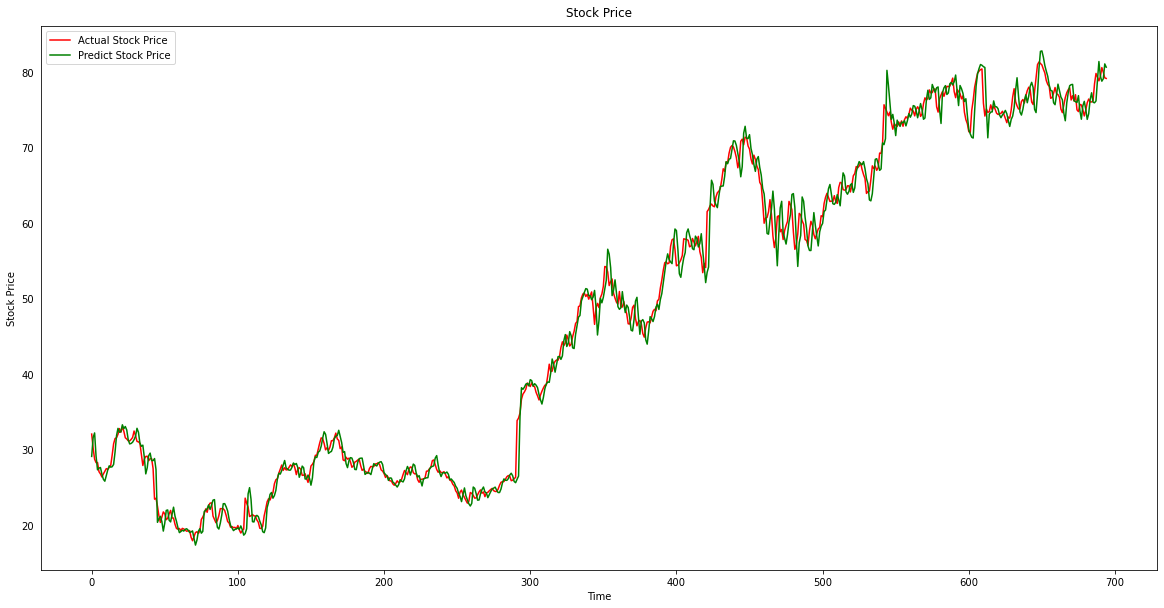

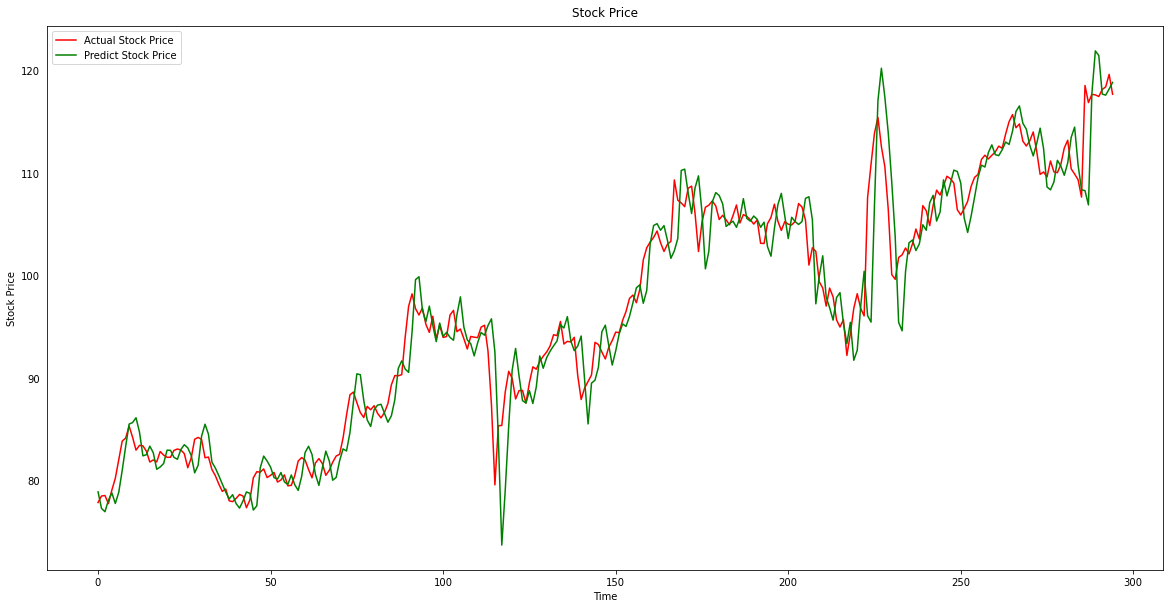

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 1.718, 1.225
RMSE_test, MAE_test = 3.0812, 2.0998

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.4582
Precision  according to the trend: 0.4187
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.415
Precision  according to the trend: 0.3571


In [10]:
y_train, y_train_pred = ARIMA_LSTM_predict(model, data_train,order=order, timeStep=timeStep)

y_test, y_test_pred = ARIMA_LSTM_predict(model, data_test, order=order, timeStep=timeStep)

# plot graphs
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)

print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)